In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import numpy as np
from datetime import datetime
from pandas import DataFrame
import warnings
import logging
warnings.filterwarnings('ignore')
logging.getLogger().setLevel(logging.ERROR)

In [2]:
sample_d = pd.read_csv('C:\\Users\\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\candidate_excercise\\sample_part_D.csv')
concept = pd.read_csv('C:\\Users\\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\candidate_excercise\\concept.csv')
conditions = pd.read_csv('C:\\Users\\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\candidate_excercise\\conditions.csv')

In [3]:
sample_d

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_day_supply_ge65,total_drug_cost_ge65,total_30_day_fill_count,total_30_day_fill_count_ge65
0,1003002817,IGLESIAS,NAYVIS,DORAL,FL,Family Practice,S,CILOSTAZOL,CILOSTAZOL,14.0,...,4020,1428.25,NaN,#,110,NaN,3450,1278.20,134.0,115.0
1,1003809963,REXINGER,KENNETH,SAN CLEMENTE,CA,Internal Medicine,S,VALSARTAN-HYDROCHLOROTHIAZIDE,VALSARTAN/HYDROCHLOROTHIAZIDE,14.0,...,3596,4558.19,14.0,NaN,82,NaN,3596,4558.19,120.0,120.0
2,1003814146,PATEL,KETAN,DALLAS,TX,Internal Medicine,S,CLONIDINE HCL,CLONIDINE HCL,37.0,...,2191,634.61,NaN,#,59,NaN,1517,411.03,101.0,77.0
3,1003839044,TEDESCO,JOHN,LAND O LAKES,FL,Family Practice,S,CLONIDINE HCL,CLONIDINE HCL,17.0,...,3180,521.82,NaN,#,44,NaN,2100,342.02,106.0,70.0
4,1003839101,FLOOD,THOMAS,ATLANTA,GA,Endocrinology,S,BD ULTRA-FINE PEN NEEDLE,"NEEDLES, INSULIN DISPOSABLE",37.0,...,5863,5056.33,NaN,#,127,NaN,5170,4448.46,204.3,180.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1912098872,RODRIGUEZ,LEONEL,BLYTHE,CA,Family Practice,S,DILTIAZEM 24HR ER,DILTIAZEM HCL,NaN,...,1920,1121.46,NaN,*,38,NaN,1500,908.13,64.0,50.0
15996,1912901968,DURAN,AURELIO,ORLANDO,FL,Cardiac Electrophysiology,S,SOTALOL,SOTALOL HCL,53.0,...,10825,5039.45,NaN,#,194,NaN,9865,4233.56,361.5,329.5
15997,1912905282,LOPEZ PAGAN,RAFAEL,BARRANQUITAS,PR,Internal Medicine,S,HUMULIN 70-30,INSULIN NPH HUM/REG INSULIN HM,NaN,...,1968,12900.04,NaN,*,67,NaN,1968,12900.04,69.0,69.0
15998,1912919234,WARRINGTON,JAMES,CLEVELAND,MS,Family Practice,S,FLUOXETINE HCL,FLUOXETINE HCL,13.0,...,2379,806.28,NaN,*,59,NaN,1263,450.16,136.0,65.0


In [4]:
sample_d.total_claim_count

0        121
1         82
2         81
3         64
4        141
        ... 
15995     52
15996    212
15997     67
15998    130
15999     64
Name: total_claim_count, Length: 16000, dtype: int64

### Q1

In [5]:
conditions['condition_length'] = pd.to_datetime(conditions['condition_end_date'])- pd.to_datetime(conditions['condition_start_date'])
conditions['condition_length'] = conditions['condition_length'].astype('timedelta64[D]')
conditions['condition_length'] = conditions['condition_length'].astype(int)

def f(row):
    if row['condition_length'] < 1:
        val = 'Same Day Visit'
    elif row['condition_length'] < 10:
        val = 'Less Than 10 Days Visit'
    elif row['condition_length'] < 30:
        val = 'Less Than a Month Visit'
    else:
        val = 'More Than a Month'
    return val

conditions['condition_length_desc'] = conditions.apply(f, axis=1)

conditions

,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id,condition_length,condition_length_desc
0,39064745,314249,376966,2/14/10,NaN,2/14/10,NaN,38000230,NaN,133849.0,15078671,NaN,36252,44828900,NaN,NaN,0,Same Day Visit
1,39064868,314249,375538,8/24/09,NaN,8/24/09,NaN,38000230,NaN,121831.0,15078712,NaN,36254,44835854,NaN,NaN,0,Same Day Visit
2,39068069,314272,134668,7/11/09,NaN,7/11/09,NaN,38000230,NaN,647442.0,15079946,NaN,4730,44834765,NaN,NaN,0,Same Day Visit
3,39069618,314282,378419,10/30/08,NaN,10/30/08,NaN,38000230,NaN,134182.0,15080545,NaN,3310,44826537,NaN,NaN,0,Same Day Visit
4,39072830,314301,374940,9/10/09,NaN,9/10/09,NaN,38000230,NaN,479701.0,15081737,NaN,37446,44819655,NaN,NaN,0,Same Day Visit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,72679426,584960,40493038,5/15/09,NaN,5/22/09,NaN,38000200,NaN,549395.0,28054562,NaN,3849,44827487,NaN,NaN,7,Less Than 10 Days Visit
15996,72680054,584965,192357,4/16/10,NaN,4/21/10,NaN,38000200,NaN,181127.0,28054791,NaN,5601,44834816,NaN,NaN,5,Less Than 10 Days Visit
15997,72953237,587195,440556,4/2/10,NaN,4/4/10,NaN,38000200,NaN,61284.0,28159644,NaN,82009,44829353,NaN,NaN,2,Less Than 10 Days Visit
15998,73162719,588885,437833,3/23/08,NaN,3/26/08,NaN,38000200,NaN,42204.0,28240715,NaN,2768,44834567,NaN,NaN,3,Less Than 10 Days Visit


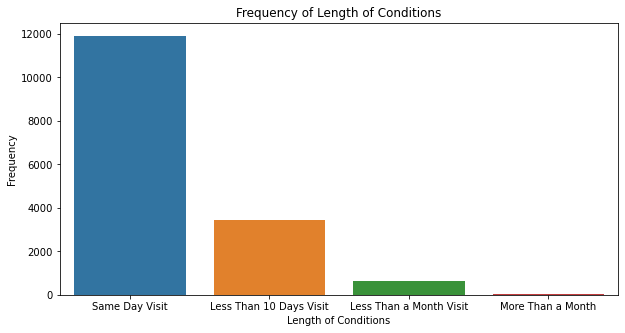

In [6]:
plt.subplots(figsize=(10,5))
sns.countplot(x='condition_length_desc', data=conditions)

plt.xlabel('Length of Conditions')
plt.ylabel('Frequency')
plt.title('Frequency of Length of Conditions')
plt.savefig('condition.png', dpi = 300, bbox_inches='tight')
plt.show()

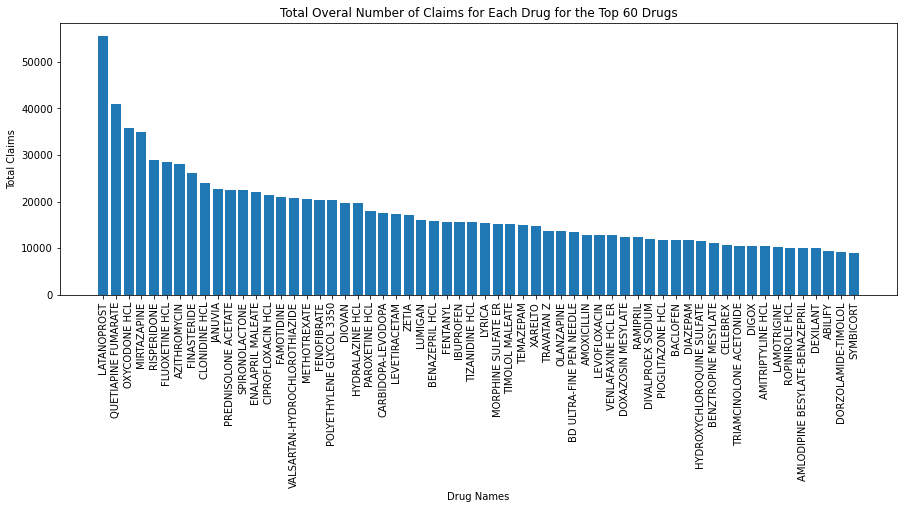

In [7]:
plt.subplots(figsize=(15,5))
total_claims = sample_d.groupby('drug_name')['total_claim_count'].sum().sort_values(ascending=False).head(60)
barlist = plt.bar(total_claims.index,total_claims, data=sample_d)
plt.xlabel('Drug Names')
plt.ylabel('Total Claims')
plt.xticks(rotation=90)
plt.title('Total Overal Number of Claims for Each Drug for the Top 60 Drugs')
plt.savefig('drug.png', dpi = 300, bbox_inches='tight')
plt.show()

### Q2

#### Python

In [8]:
sample_d.groupby(['npi','drug_name'])['total_claim_count','total_drug_cost'].sum()

,,total_claim_count,total_drug_cost
npi,drug_name,,
1003002072,JALYN,136,21282.98
1003002643,AMOXICILLIN,92,250.81
1003002817,CILOSTAZOL,121,1428.25
1003003609,CALCITRIOL,54,2521.35
1003006552,AMOXICILLIN,124,564.84
...,...,...,...
1992872816,FLUOXETINE HCL,131,1393.91
1992887061,PROPRANOLOL HCL,36,257.32
1992893127,ZETIA,198,65795.42


#### SQL

SELECT sum(total_claim_count), sum(total_drug_cost)
FROM sample_d
GROUP BY npi, drug_name

### Q3

#### Python

In [9]:
sample_d.groupby('specialty_description').total_drug_cost.mean().sort_values(ascending=False).head(3)

specialty_description
Infectious Disease    184919.854773
Medical Oncology       91957.688684
CRNA                   84303.390000
Name: total_drug_cost, dtype: float64

#### SQL

SELECT AVG(total_drug_cost)
FROM sample_d
GROUP BY specialty_description
ORDER BY 1 DESC
LIMIT 3

### Q4

#### Python

In [10]:
concept = concept[['concept_id','concept_name']]
conditions = conditions[['person_id','condition_source_concept_id']]
concept['concept_id'] = concept['concept_id'].astype(str)
conditions['person_id'] = conditions['person_id'].astype(str)
conditions['condition_source_concept_id'] = conditions['condition_source_concept_id'].astype(str)

pd.merge(concept,conditions,left_on='concept_id',right_on='condition_source_concept_id')[['person_id','concept_name']]

,person_id,concept_name
0,1305665,Benign endometrial hyperplasia
1,2305324,Pouchitis
2,388524,Merkel cell carcinoma of the upper limb
3,1260543,Merkel cell carcinoma of the upper limb
4,1889334,Merkel cell carcinoma of the upper limb
5,98838,Suspected problem with fetal growth not found
6,435526,Suspected problem with fetal growth not found
7,1003095,Other fluid overload
8,132277,Other fluid overload
9,189121,Other fluid overload


#### SQL

SELECT cond.person_id, conc.concept_name
FROM concept conc
JOIN conditions cond
ON conc.concept_id = cond.condition_source_concept_id